# Classification Analysis

org: **D4G**  project: **BGCO**  task: **exploratory data analysis**

data: labeled (engage vs. static) dataset highlighting changes in member engagement (visits per week) between first and year of engagement

## Prep the environment

In [2]:
import pandas as pd  # used to manipulate dataframes
import numpy as np # used to manipulate series

import seaborn as sns  # needed for visualing
import matplotlib.pyplot as plt  # needed for visualing

## Data Wrangling

### Load Data
v001 - no postal code data
v002 - distance to clubhouse, neighborhood included

In [80]:
# read in the dataframe
df_001 = pd.read_csv("D4G_BGCO_Churn_Labeled_ForEDA_v002.csv", encoding = "cp1252")

## Version Control

In [81]:
df = df_001

In [102]:
print("The training set has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

The training set has 1728 rows and 16 columns


In [83]:
df.head()

,d4g_member_id,label,first_year,member_location,sex,Y1_Age,checkin_total,season_most,club_km
0,-2145542991,static,2013,BRIT,F,10,19,winter,1.22
1,-2145245024,static,2015,RID,M,17,1,winter,NaN
2,-2143641867,engaged,2009,BRIT,M,11,12,winter,7.08
3,-2140123971,static,2013,PYC,M,15,1,winter,7.74
4,-2140034903,static,2009,PYC,M,7,8,winter,7.51


In [84]:
df.columns

Index(['d4g_member_id', 'label', 'first_year', 'member_location', 'sex',
       'Y1_Age', 'checkin_total', 'season_most', 'club_km'],
      dtype='object')

### Organise Features

Postal code data is incomplete (~23% of the data is missing)

In [85]:
df.dropna(inplace=True)

In [86]:
df = df.drop(['d4g_member_id'], axis =1)

categorical_features = ['member_location', 'sex', 'season_most']

numerical_features = ['first_year', 'Y1_Age', 'checkin_total', 'club_km']

target = ['label']

## Numerical Features

In [87]:
df[numerical_features].describe()

,first_year,Y1_Age,checkin_total,club_km
count,1728.000000,1728.000000,1728.000000,1728.000000
mean,2013.614005,10.567708,10.531829,15.495828
std,2.856492,3.067856,10.368996,30.332139
min,2009.000000,2.000000,1.000000,0.000000
25%,2011.000000,8.000000,2.000000,4.530000
50%,2014.000000,10.000000,7.000000,8.370000
75%,2016.000000,13.000000,16.000000,14.420000
max,2018.000000,19.000000,39.000000,395.210000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BD72E5D68>,
      dtype=object)

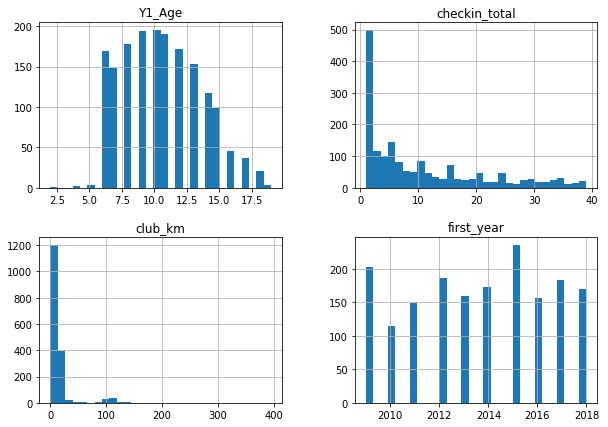

In [88]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BD92D3C88>,
      dtype=object)

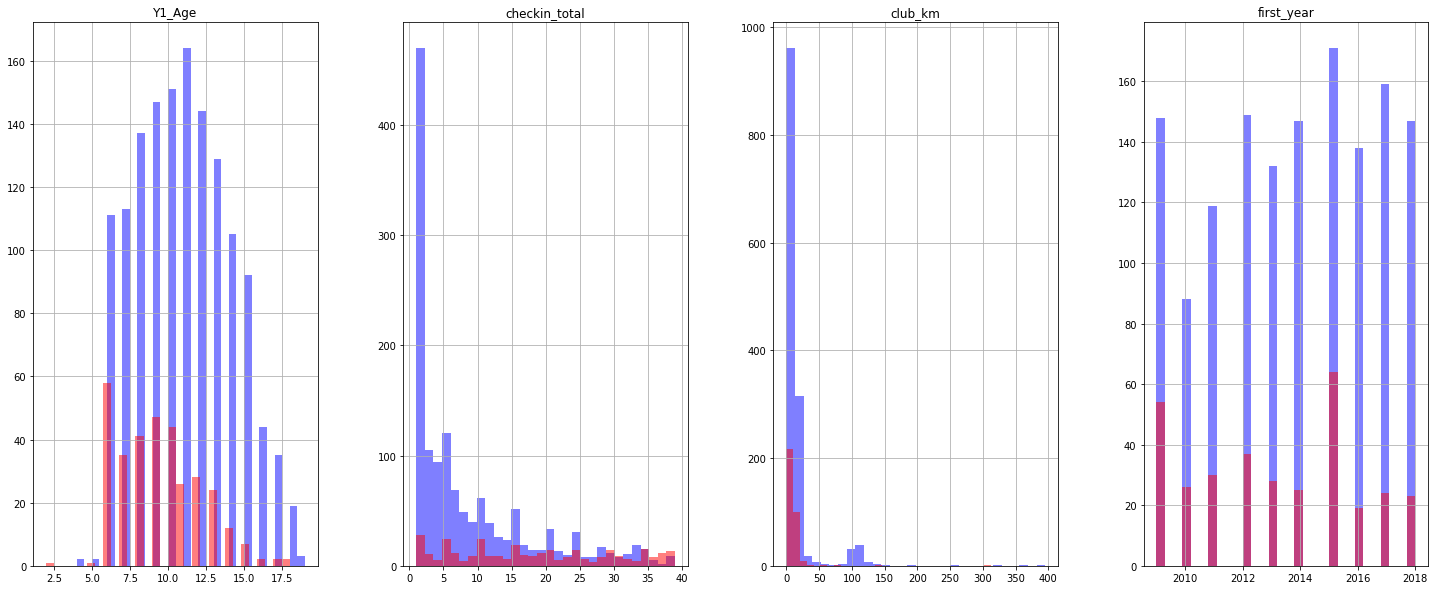

In [90]:
fig, ax = plt.subplots(1, 4, figsize=(25, 10))
df[df.label == "static"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.label == "engaged"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

## Categorical Features

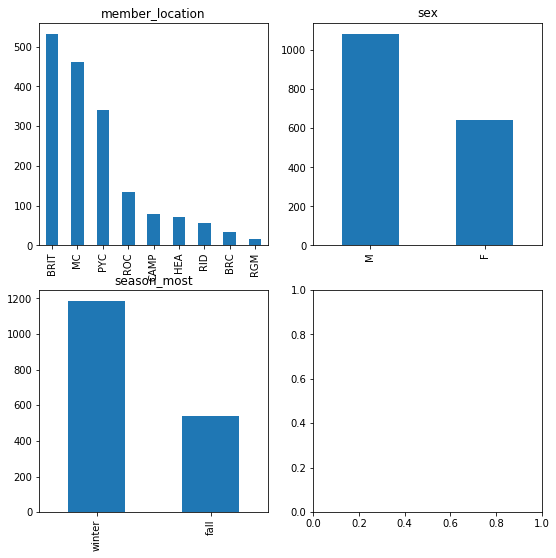

In [91]:
ROWS, COLS = 2, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(9, 9))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'engaged')

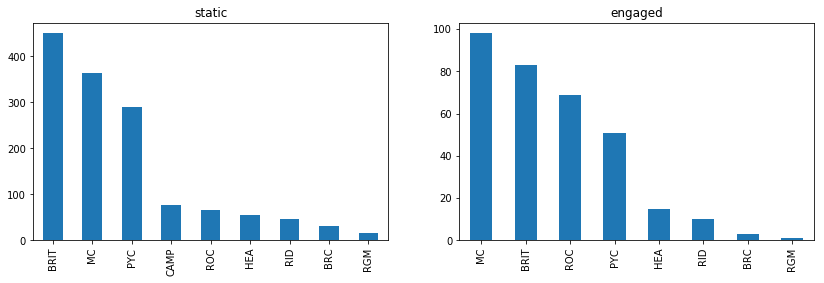

In [92]:
feature = "member_location"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

Text(0.5, 1.0, 'engaged')

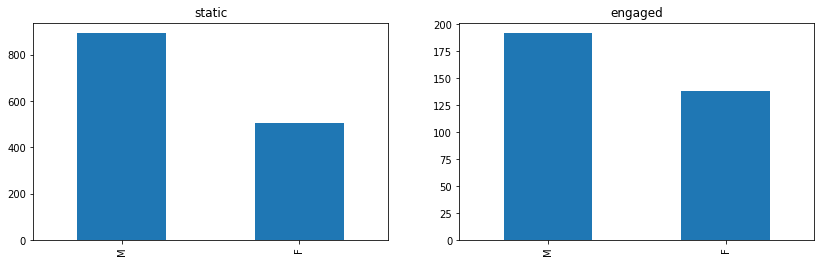

In [93]:
feature = "sex"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

Text(0.5, 1.0, 'engaged')

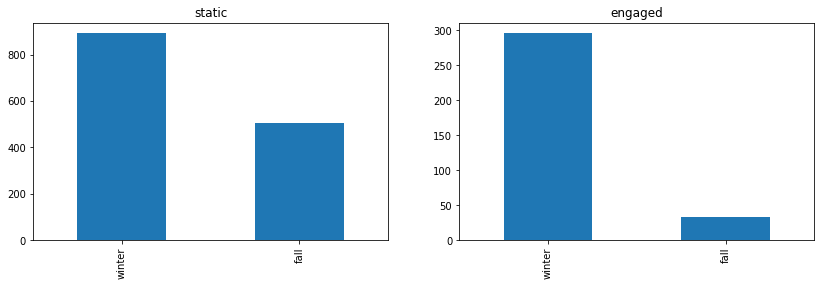

In [94]:
feature = "season_most"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

## Target Feature

Text(0.5, 1.0, 'engaged')

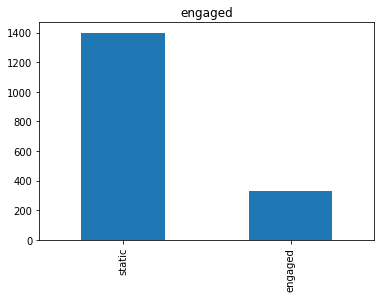

In [95]:
df['label'].value_counts().plot('bar').set_title('engaged')

## Encode Data

In [96]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df.columns:
    if df[column].dtype == object and column != 'customerID':
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)
            
#apply get dummies for selected columns
df = pd.get_dummies(data = df, columns = dummy_columns)

In [97]:
df.head()

,label,first_year,sex,Y1_Age,checkin_total,season_most,club_km,member_location_BRC,member_location_BRIT,member_location_CAMP,member_location_HEA,member_location_MC,member_location_PYC,member_location_RGM,member_location_RID,member_location_ROC
0,1,2013,0,10,19,1,1.22,0,1,0,0,0,0,0,0,0
2,0,2009,1,11,12,1,7.08,0,1,0,0,0,0,0,0,0
3,1,2013,1,15,1,1,7.74,0,0,0,0,0,1,0,0,0
4,1,2009,1,7,8,1,7.51,0,0,0,0,0,1,0,0,0
6,0,2017,1,9,35,1,5.30,0,0,0,0,0,1,0,0,0


## Binary Classication Model with XGBoost

In [98]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

In [103]:
# create feature set and labels
X = df.drop(['label'],axis=1)
y = df.label

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.91
Accuracy of XGB classifier on test set: 0.76
              precision    recall  f1-score   support

           0       0.50      0.19      0.28        21
           1       0.78      0.94      0.86        66

   micro avg       0.76      0.76      0.76        87
   macro avg       0.64      0.56      0.57        87
weighted avg       0.72      0.76      0.72        87



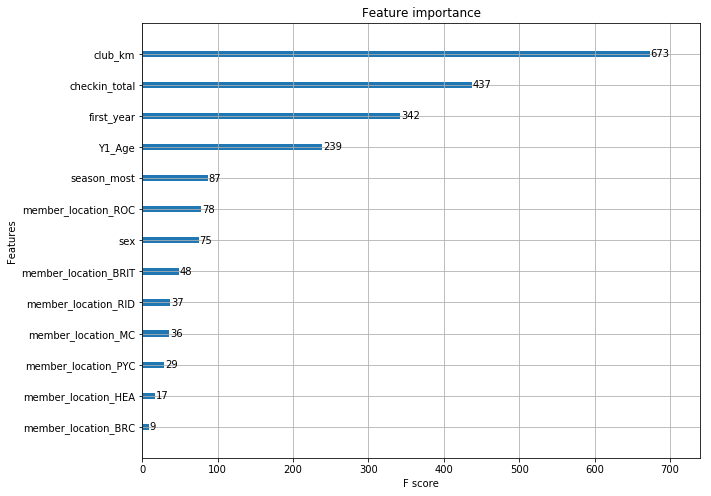

In [101]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)